<a href="https://colab.research.google.com/github/AnastasiaBrinati/experiments/blob/main/EndpointStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistiche degli endpoints

In [44]:
# Use seaborn for pairplot.
!pip install datasets

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
from datasets import load_dataset
data = load_dataset("anastasiafrosted/endpoint_stats", download_mode="force_redownload")
df = pd.DataFrame(data['train'])

endpoint_stats.csv:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/313 [00:00<?, ? examples/s]

In [47]:
df.head()

,endpoint_uuid,n_tasks,n_users,n_functions,first_function_call,last_function_call,function_rate_per_minute
0,fc1d7a40-6293-758c-2158-b7986a2089d6,575304,1,98896,2023-01-22 20:23:23,2023-07-03 01:59:57,2.478513
1,b1e0ed9d-91b9-8f22-1fb0-a9239b843d4d,212391,1,3003,2023-01-20 06:45:26,2023-07-03 01:59:47,0.900670
2,b0016b02-ef05-e6fa-659e-b6810fc9653b,132860,2,72,2022-12-20 05:30:44,2023-06-28 20:33:08,0.484109
3,981c92a0-1480-e5b1-1432-0620dc90b7f8,110450,2,110450,2023-01-05 21:46:10,2023-06-11 20:17:16,0.488866
4,9b1d9849-dd78-51bb-cb47-c48ebc5ef9c9,63048,1,32,2023-06-13 05:46:25,2023-06-14 18:01:27,28.987142


### NUMERO DI INVOCAZIONI (TASKS) PER ENDPOINT

In [48]:
tot_end = len(df)
print("Numero totale di endpoint: ")
print(tot_end)
poche_invoc = len(df[df['n_tasks'] < 50])
print("Quanti endpoint eseguono meno di 50 task?")
print(poche_invoc)
tante_invoc = len(df[df['n_tasks'] > 1000])
print("Quanti endpoint eseguono più di 1000 task?")
print(tante_invoc)

Numero totale di endpoint: 
313
Quanti endpoint eseguono meno di 50 task?
220
Quanti endpoint eseguono più di 1000 task?
31


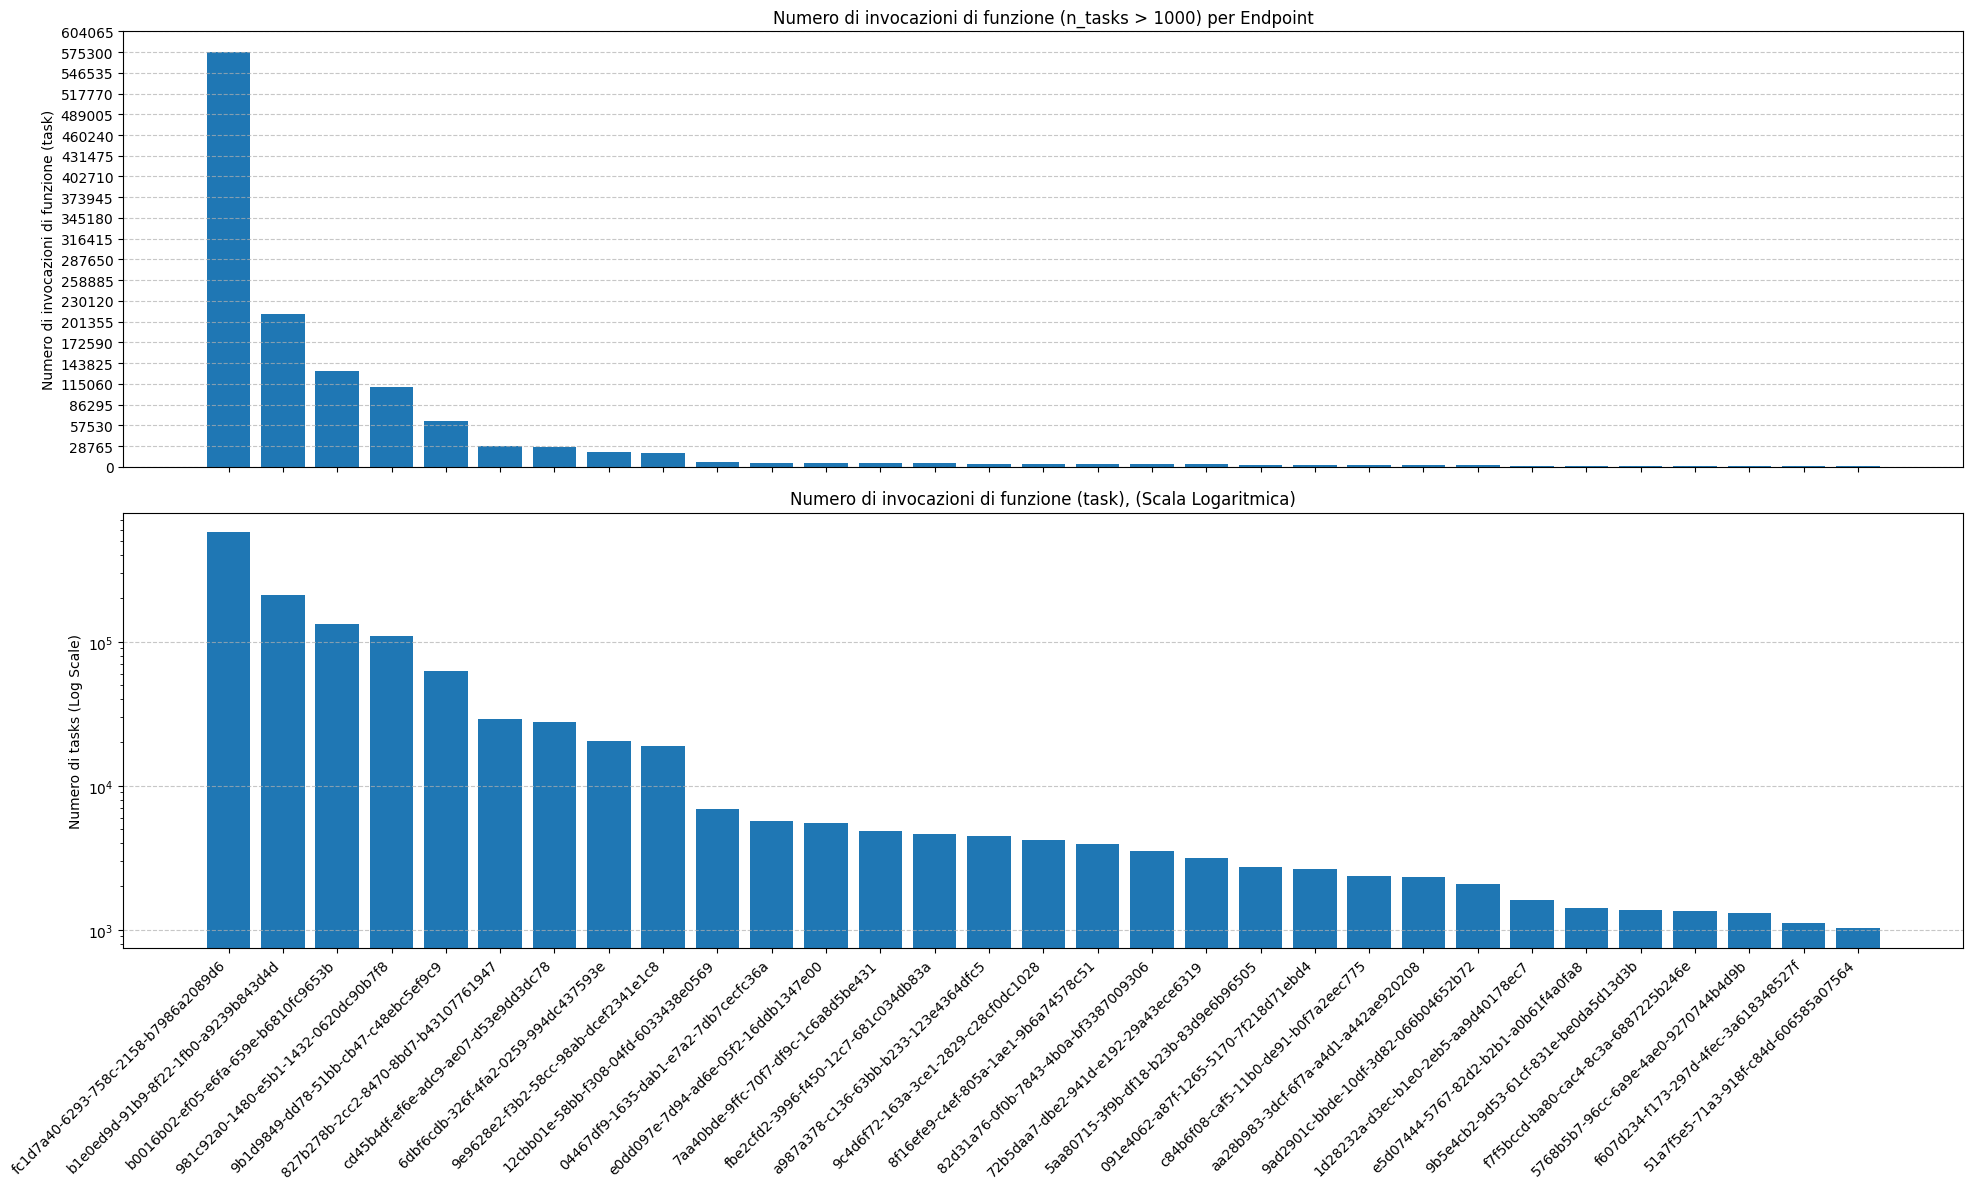

In [49]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[0].set_ylabel('Numero di invocazioni di funzione (task)')
axes[0].set_title('Numero di invocazioni di funzione (n_tasks > 1000) per Endpoint')
y_max = filtered_df['n_tasks'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[1].set_ylabel('Numero di tasks (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Numero di invocazioni di funzione (task), (Scala Logaritmica)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### NUMERO DI FUNZIONI DISTINTE PER ENDPOINT

In [50]:
quante_func = len(df[df['n_functions'] < 1])
print("Quanti endpoint eseguono solo una funzione?")
print(quante_func)
quante_func = len(df[df['n_functions'] > 50])
print("Quanti endpoint eseguono più di 50 funzioni?")
print(quante_func)

Quanti endpoint eseguono solo una funzione?
0
Quanti endpoint eseguono più di 50 funzioni?
39


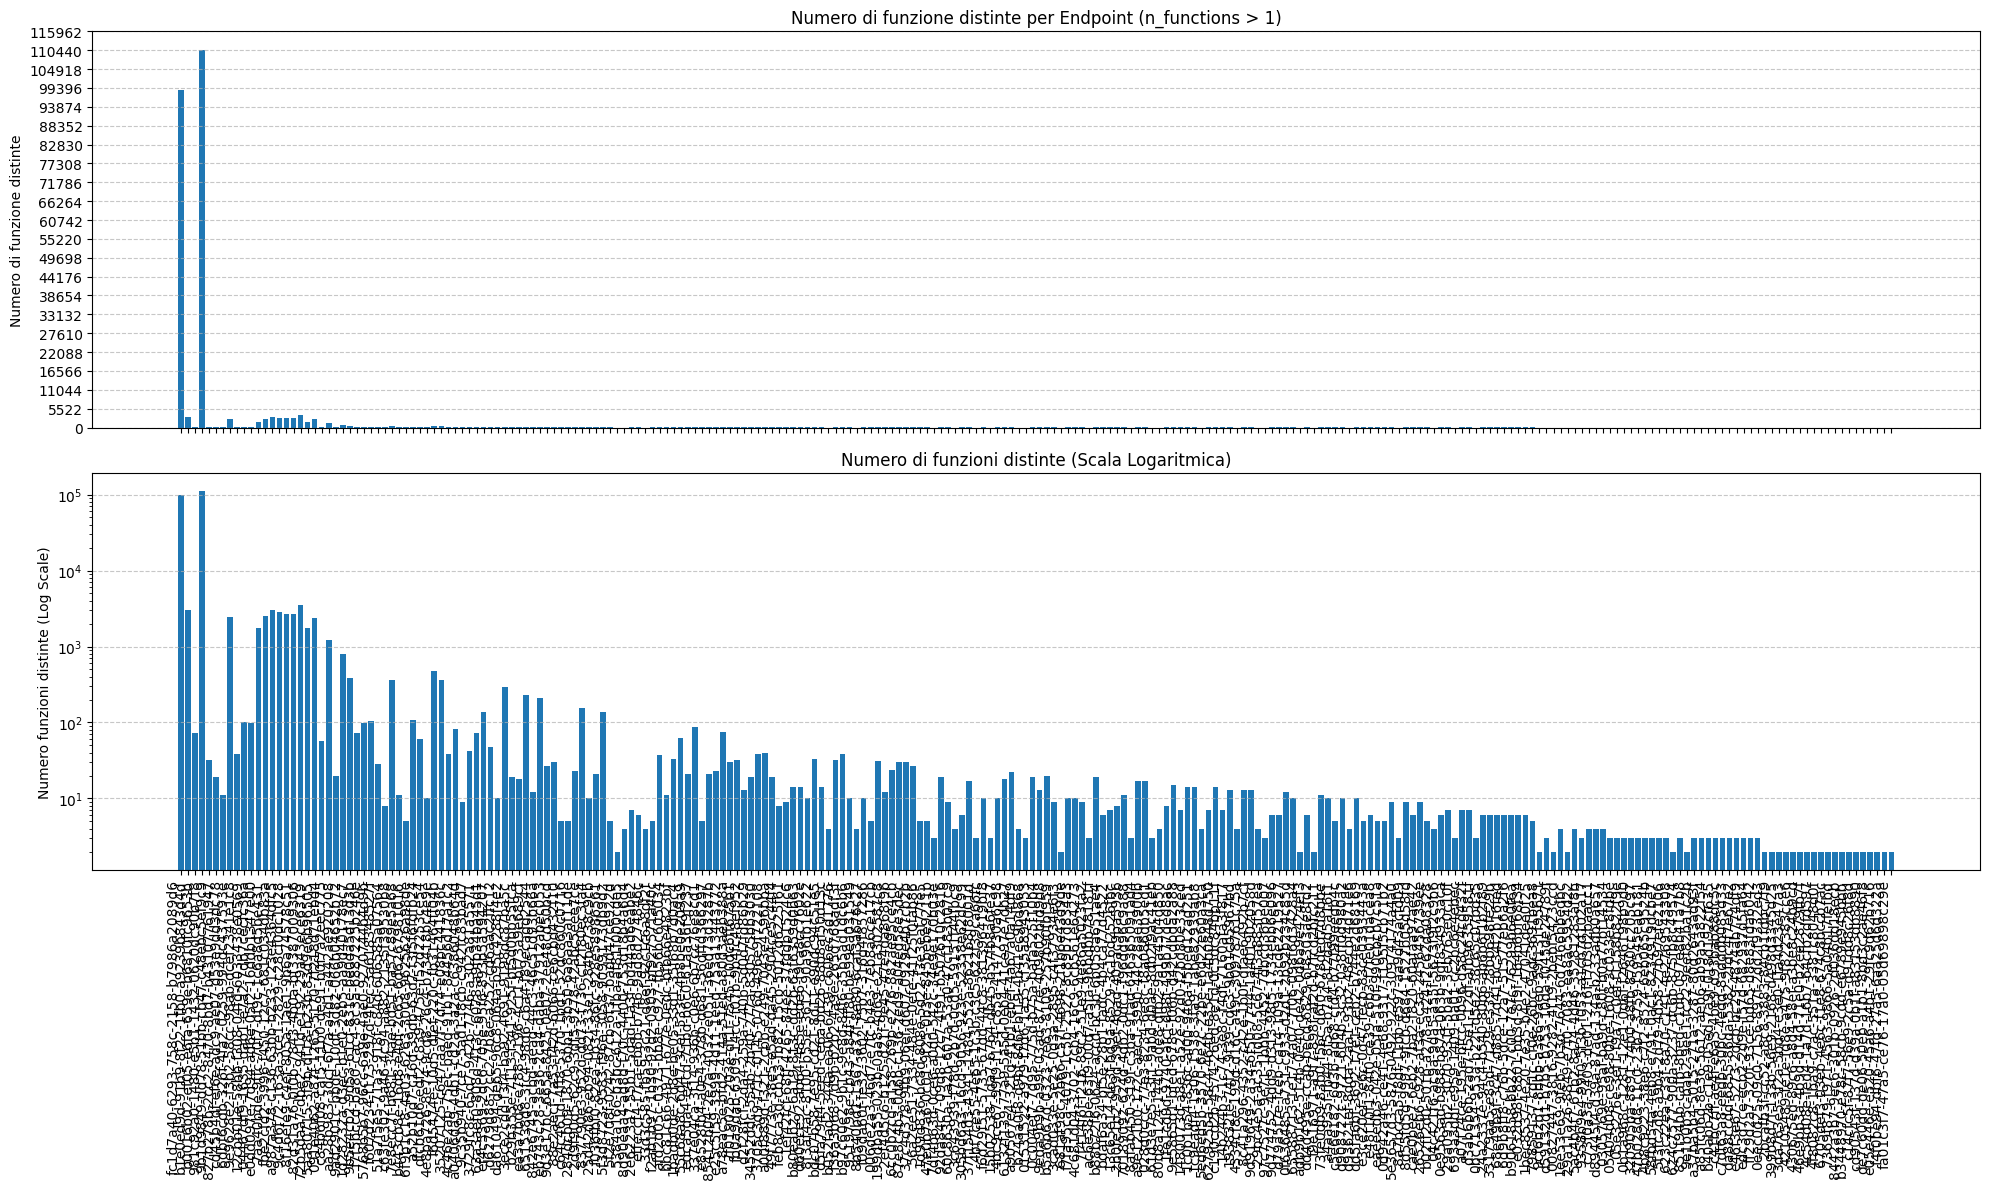

In [51]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_functions'] > 1]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'])
axes[0].set_ylabel('Numero di funzione distinte')
axes[0].set_title('Numero di funzione distinte per Endpoint (n_functions > 1)')
y_max = filtered_df['n_functions'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'])
axes[1].set_ylabel('Numero funzioni distinte (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Numero di funzioni distinte (Scala Logaritmica)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=90, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### CONFRONTO INVOCAZIONI DI FUNZIONE (TASKS) E FUNZIONI DISTINTE (FUNCTIONS)

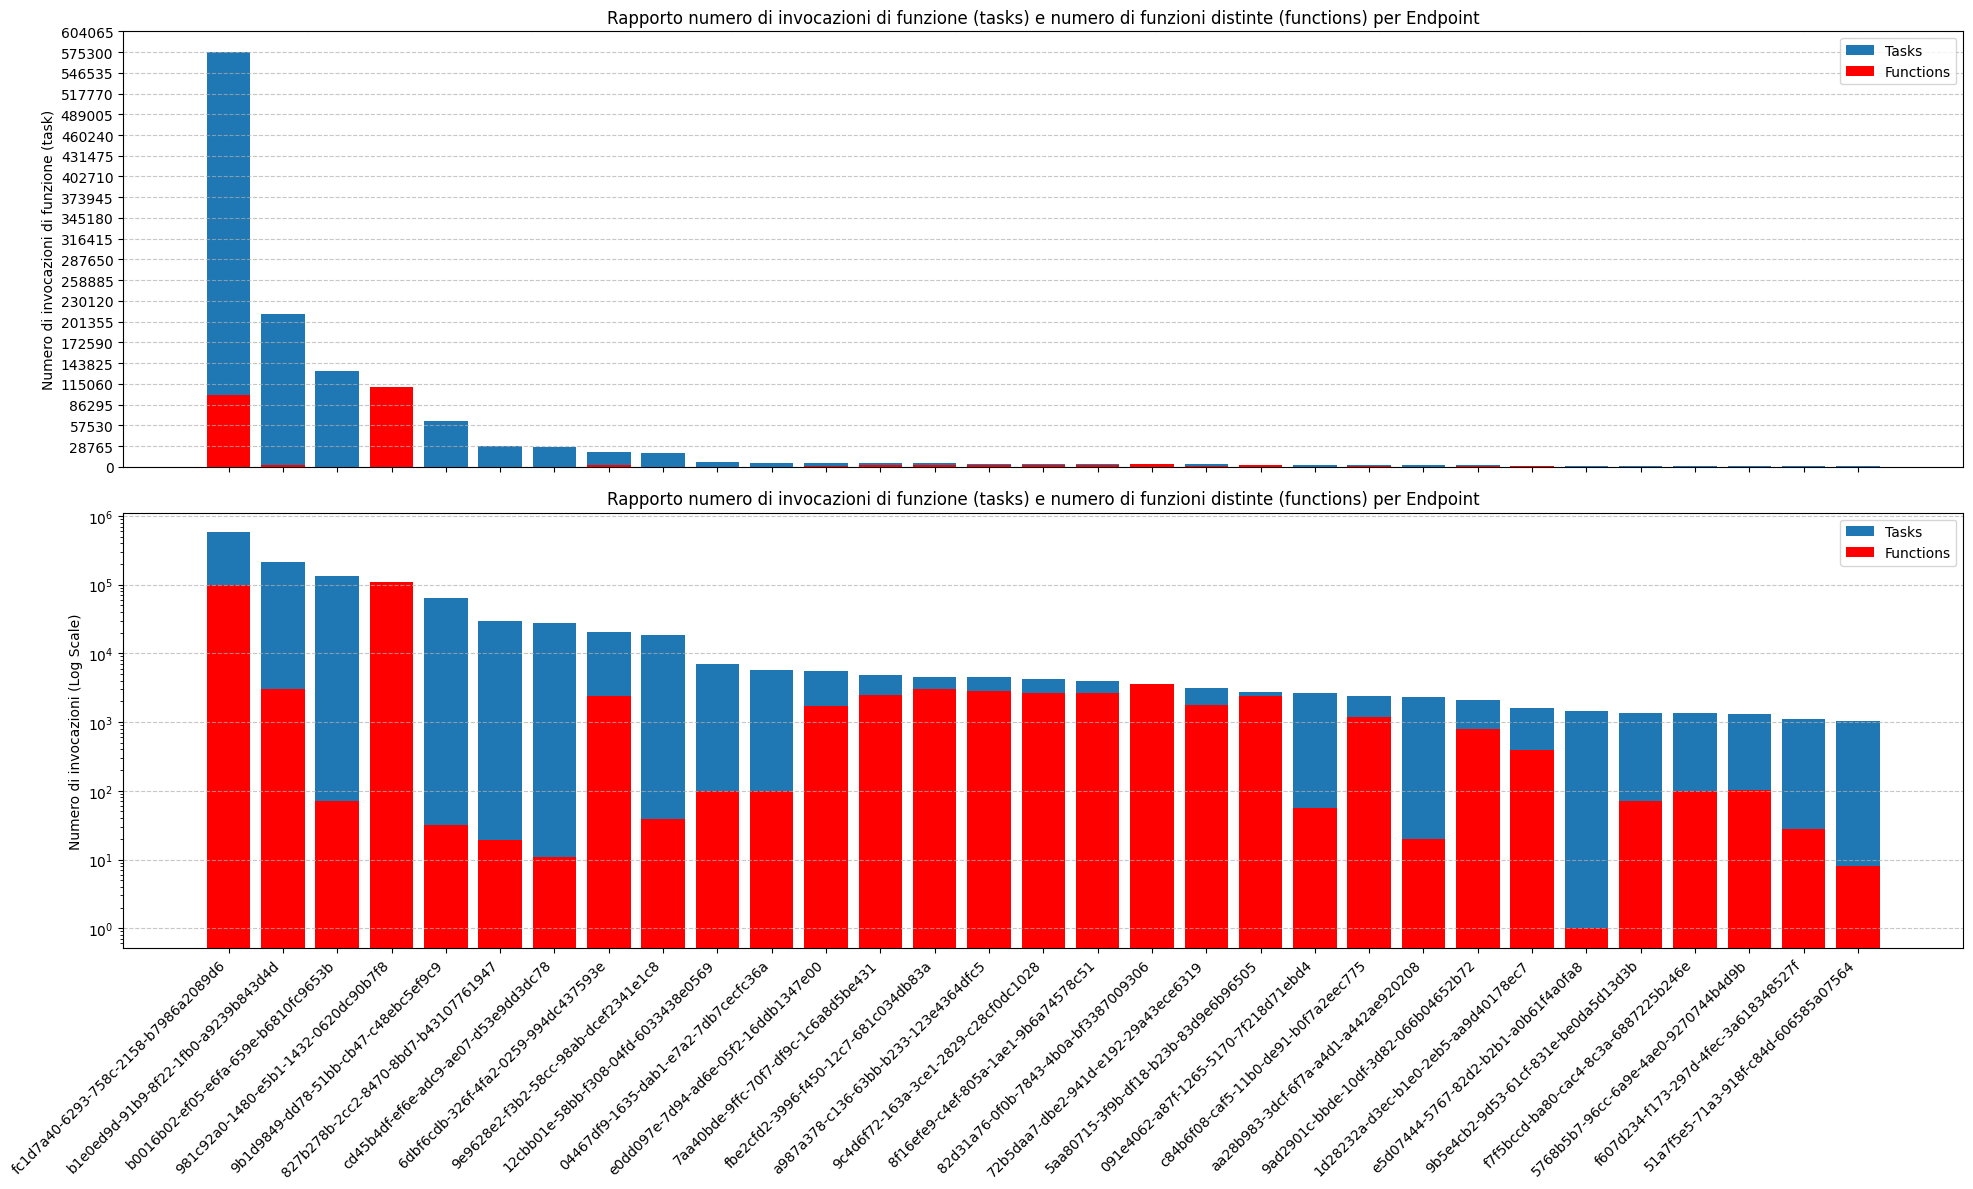

In [52]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'], color='red')
axes[0].set_ylabel('Numero di invocazioni di funzione (task)')
axes[0].set_title('Rapporto numero di invocazioni di funzione (tasks) e numero di funzioni distinte (functions) per Endpoint')
axes[0].legend(['Tasks', 'Functions'])
y_max = filtered_df['n_tasks'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'], color='red')
axes[1].set_ylabel('Numero di invocazioni (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Rapporto numero di invocazioni di funzione (tasks) e numero di funzioni distinte (functions) per Endpoint')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(['Tasks', 'Functions'])

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### NUMERO DI UTENTI PER ENDPOINT

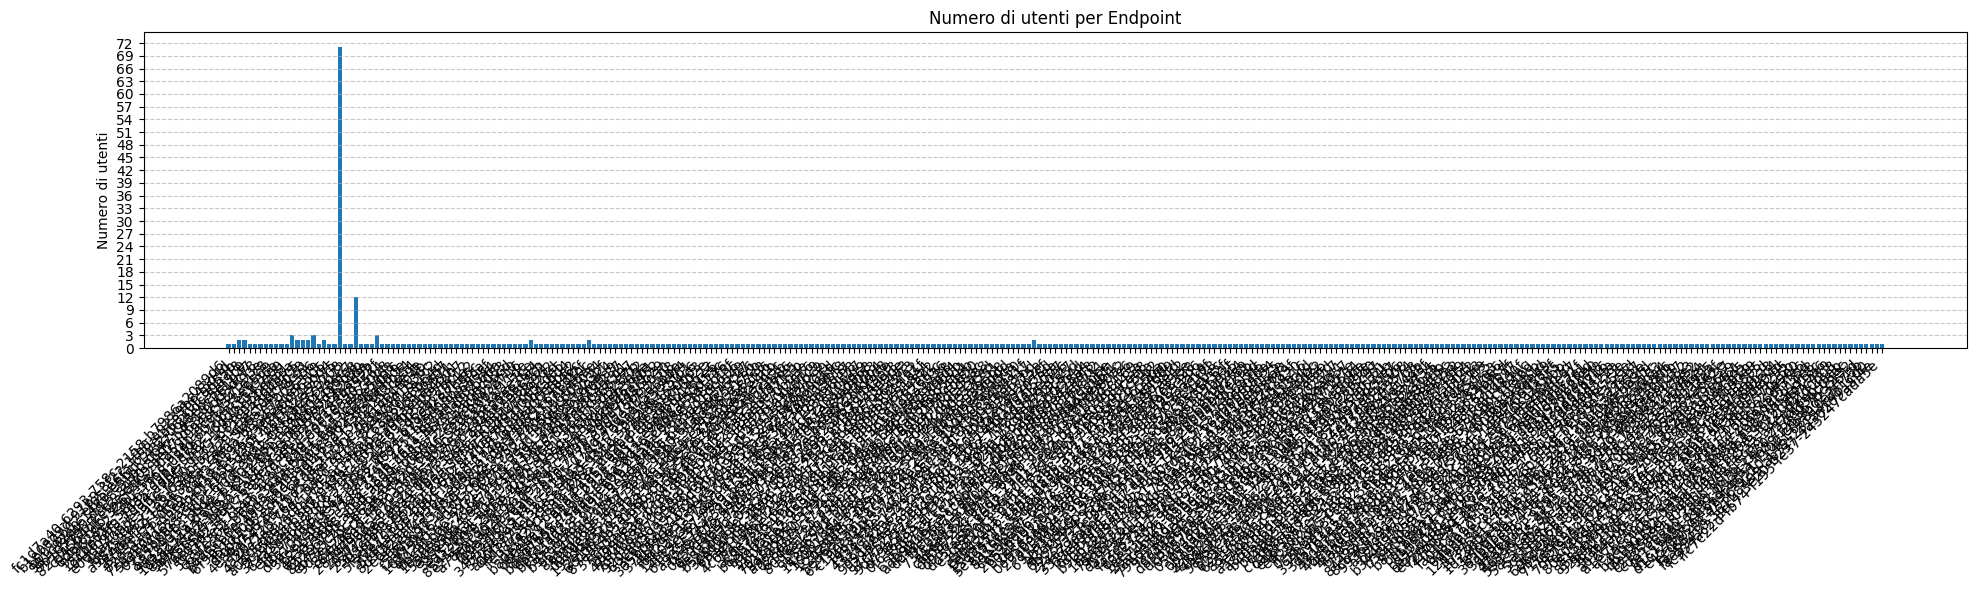

In [53]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
#filtered_df = df[df['n_functions'] > 50]

# Creare una figura con due sottotrame
plt.figure(figsize=(20, 6))

# Primo grafico: asse Y lineare
plt.bar(df['endpoint_uuid'], df['n_users'])
plt.ylabel('Numero di utenti')
plt.title('Numero di utenti per Endpoint')
y_max = df['n_users'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
plt.yticks(np.arange(0, y_max + tick_step, tick_step))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### ATTIVITa' TEMPORALE ENDPOINT

<ipython-input-54-db8897bfa6e0>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
<ipython-input-54-db8897bfa6e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
<ipython-input-54-db8897bfa6e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

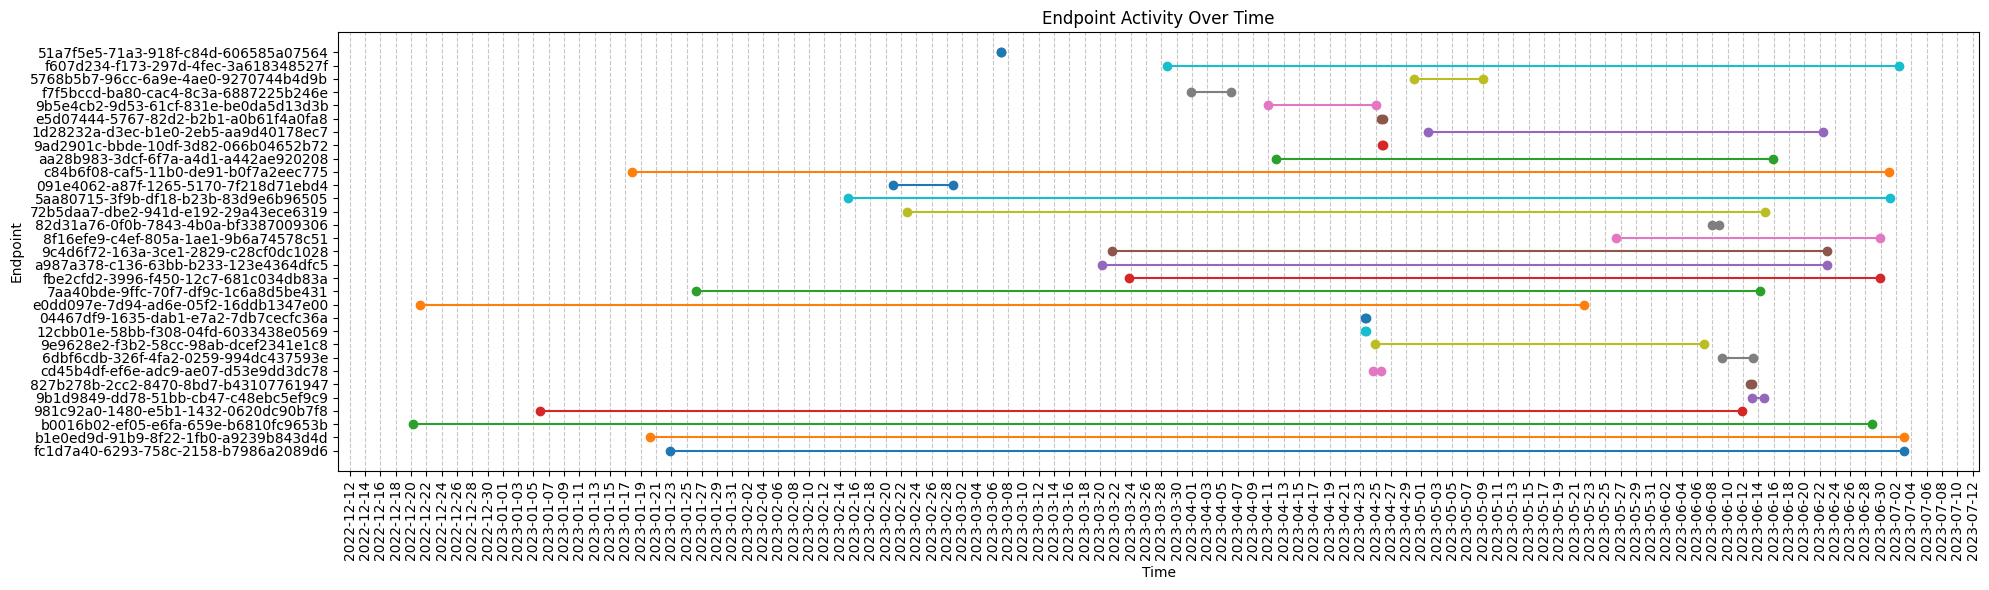

In [54]:
import matplotlib.dates as mdates

# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Convertire start_date e end_date in formato datetime
filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
filtered_df['last_function_call'] = pd.to_datetime(filtered_df['last_function_call'])

# Creare la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 6))

# Iterare per ogni riga e tracciare i segmenti
for i, row in filtered_df.iterrows():
    ax.plot([row['first_function_call'], row['last_function_call']], [row['endpoint_uuid'], row['endpoint_uuid']], marker='o', label=row['endpoint_uuid'])

# Configurare l'asse X per il tempo
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Etichetta ogni 2 giorni
plt.xticks(rotation=90)

# Aggiungere etichette e titolo
ax.set_xlabel("Time")
ax.set_ylabel("Endpoint")
ax.set_title("Endpoint Activity Over Time")

# Aggiungere la griglia
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrare il grafico
plt.tight_layout()
plt.show()


# Function invocations (tasks) overtime of top 4 endpoints

In [ ]:
e0 = load_dataset("anastasiafrosted/endpoint0_60", download_mode="force_redownload")
e1 = load_dataset("anastasiafrosted/endpoint1_60", download_mode="force_redownload")
e2 = load_dataset("anastasiafrosted/endpoint2_60", download_mode="force_redownload")
e3 = load_dataset("anastasiafrosted/endpoint3_60", download_mode="force_redownload")

df_e0 = pd.DataFrame(e0['train'])
df_e1 = pd.DataFrame(e1['train'])
df_e2 = pd.DataFrame(e2['train'])
df_e3 = pd.DataFrame(e3['train'])

# Ensure the `timestamp` column is in datetime format
df_e0['timestamp'] = pd.to_datetime(df_e0['timestamp'])
df_e1['timestamp'] = pd.to_datetime(df_e1['timestamp'])
df_e2['timestamp'] = pd.to_datetime(df_e2['timestamp'])
df_e3['timestamp'] = pd.to_datetime(df_e3['timestamp'])

In [88]:
# Create a function to plot the data
def plot_data(data, x_col, y_col, plt, label, hour_granularity):
    plt.plot(data[x_col], data[y_col], marker='o', linestyle='-', label=label, linewidth=2)
    plt.title("Top endpoints per number of invocations", fontsize=14, fontweight="bold", color="darkblue")
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Number of Invocations", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid with dashed lines
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.yticks(rotation=0)  # Adjust y-axis label size
    plt.legend(loc="upper right", fontsize=10)  # Add legend

    # Formatting x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=hour_granularity))  # Show ticks every hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format x-axis labels

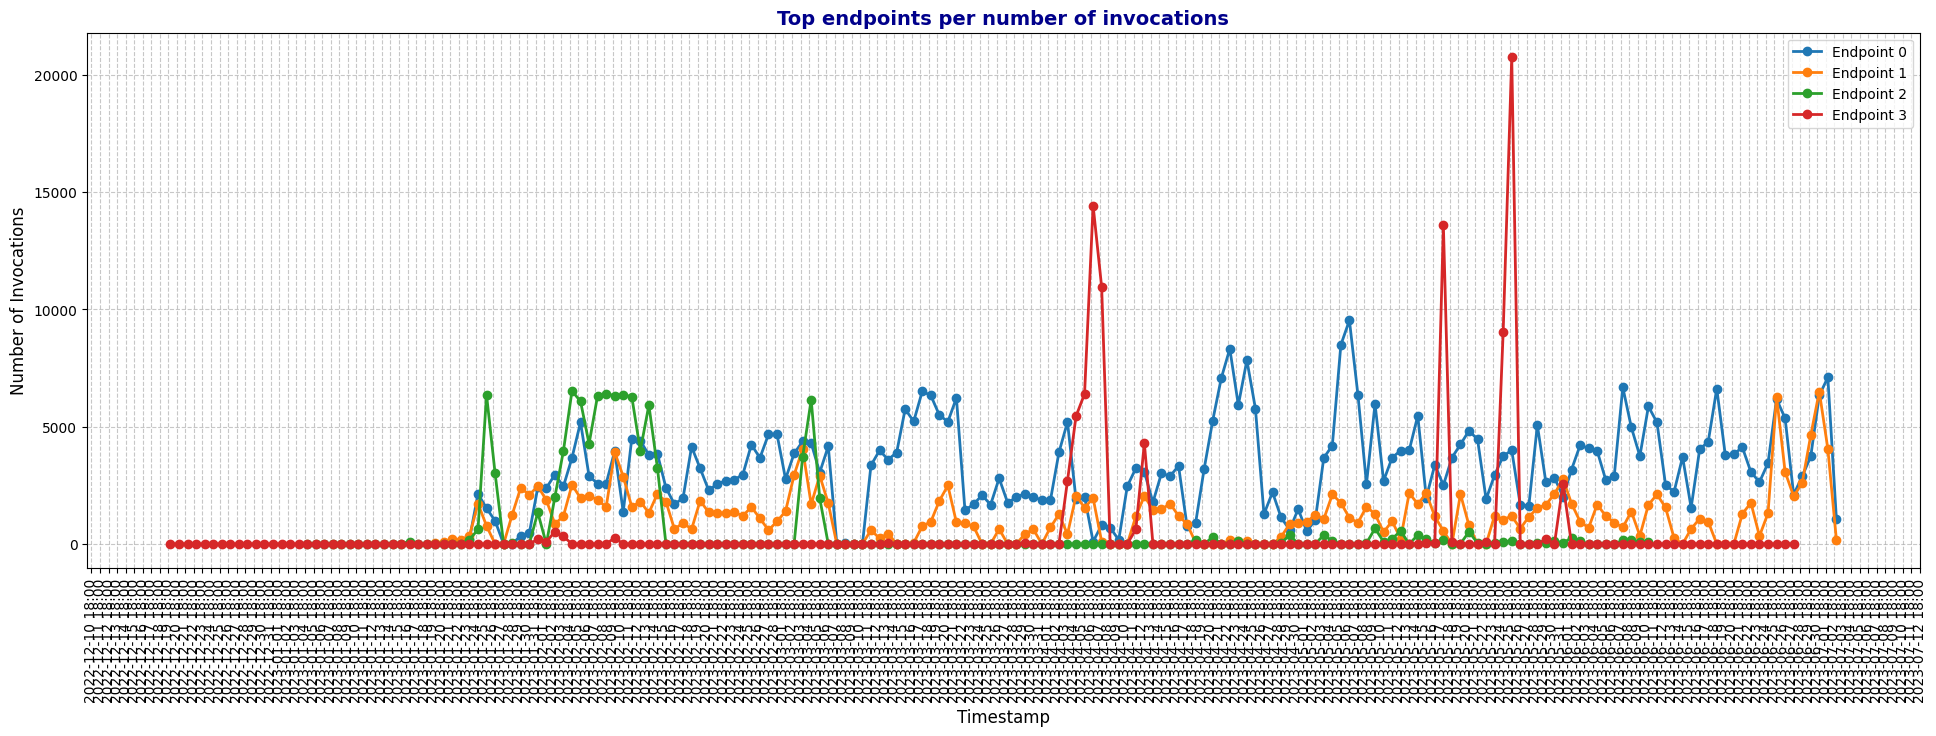

In [86]:
# Plot the data for three granularities
plt.figure(figsize=(20, 8))

hourly_granularity = 24

data_e0_24h = df_e0.resample('1440min', on='timestamp').sum().reset_index()
plot_data(data_e0_24h, "timestamp", "n_invocations", plt, "Endpoint 0", hourly_granularity)
data_e1_24h = df_e1.resample('1440min', on='timestamp').sum().reset_index()
plot_data(data_e1_24h, "timestamp", "n_invocations", plt, "Endpoint 1", hourly_granularity)
data_e2_24h = df_e2.resample('1440min', on='timestamp').sum().reset_index()
plot_data(data_e2_24h, "timestamp", "n_invocations", plt, "Endpoint 2", hourly_granularity)
data_e3_24h = df_e3.resample('1440min', on='timestamp').sum().reset_index()
plot_data(data_e3_24h, "timestamp", "n_invocations", plt, "Endpoint 3", hourly_granularity)

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

# Aggregated endpoints

In [ ]:
dataset_30 = load_dataset("anastasiafrosted/globus_30", download_mode="force_redownload")
dataset_60 = load_dataset("anastasiafrosted/globus_60", download_mode="force_redownload")
dataset_300 = load_dataset("anastasiafrosted/globus_300", download_mode="force_redownload")

df_30 = pd.DataFrame(dataset_30['train'])
df_60 = pd.DataFrame(dataset_60['train'])
df_300 = pd.DataFrame(dataset_300['train'])

# Ensure the `timestamp` column is in datetime format
df_30['timestamp'] = pd.to_datetime(df_30['timestamp'])
df_60['timestamp'] = pd.to_datetime(df_60['timestamp'])
df_300['timestamp'] = pd.to_datetime(df_300['timestamp'])

In [93]:
# Create a function to plot the data
def plot_data(data, x_col, y_col, title, ax, granularity, hourly_granularity):
    ax.plot(data[x_col], data[y_col], marker='o', linestyle='-', label=granularity, linewidth=2)
    ax.set_title(title, fontsize=14, fontweight="bold", color="darkblue")
    ax.set_xlabel("Timestamp", fontsize=12)
    ax.set_ylabel("Number of Invocations", fontsize=12)
    ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid with dashed lines
    ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels
    ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis label size
    ax.legend(loc="upper right", fontsize=10)  # Add legend

    # Formatting x-axis ticks
    if(hourly_granularity>1):
      ax.xaxis.set_major_locator(mdates.HourLocator(interval=hourly_granularity))  # Show ticks every hour
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format x-axis labels

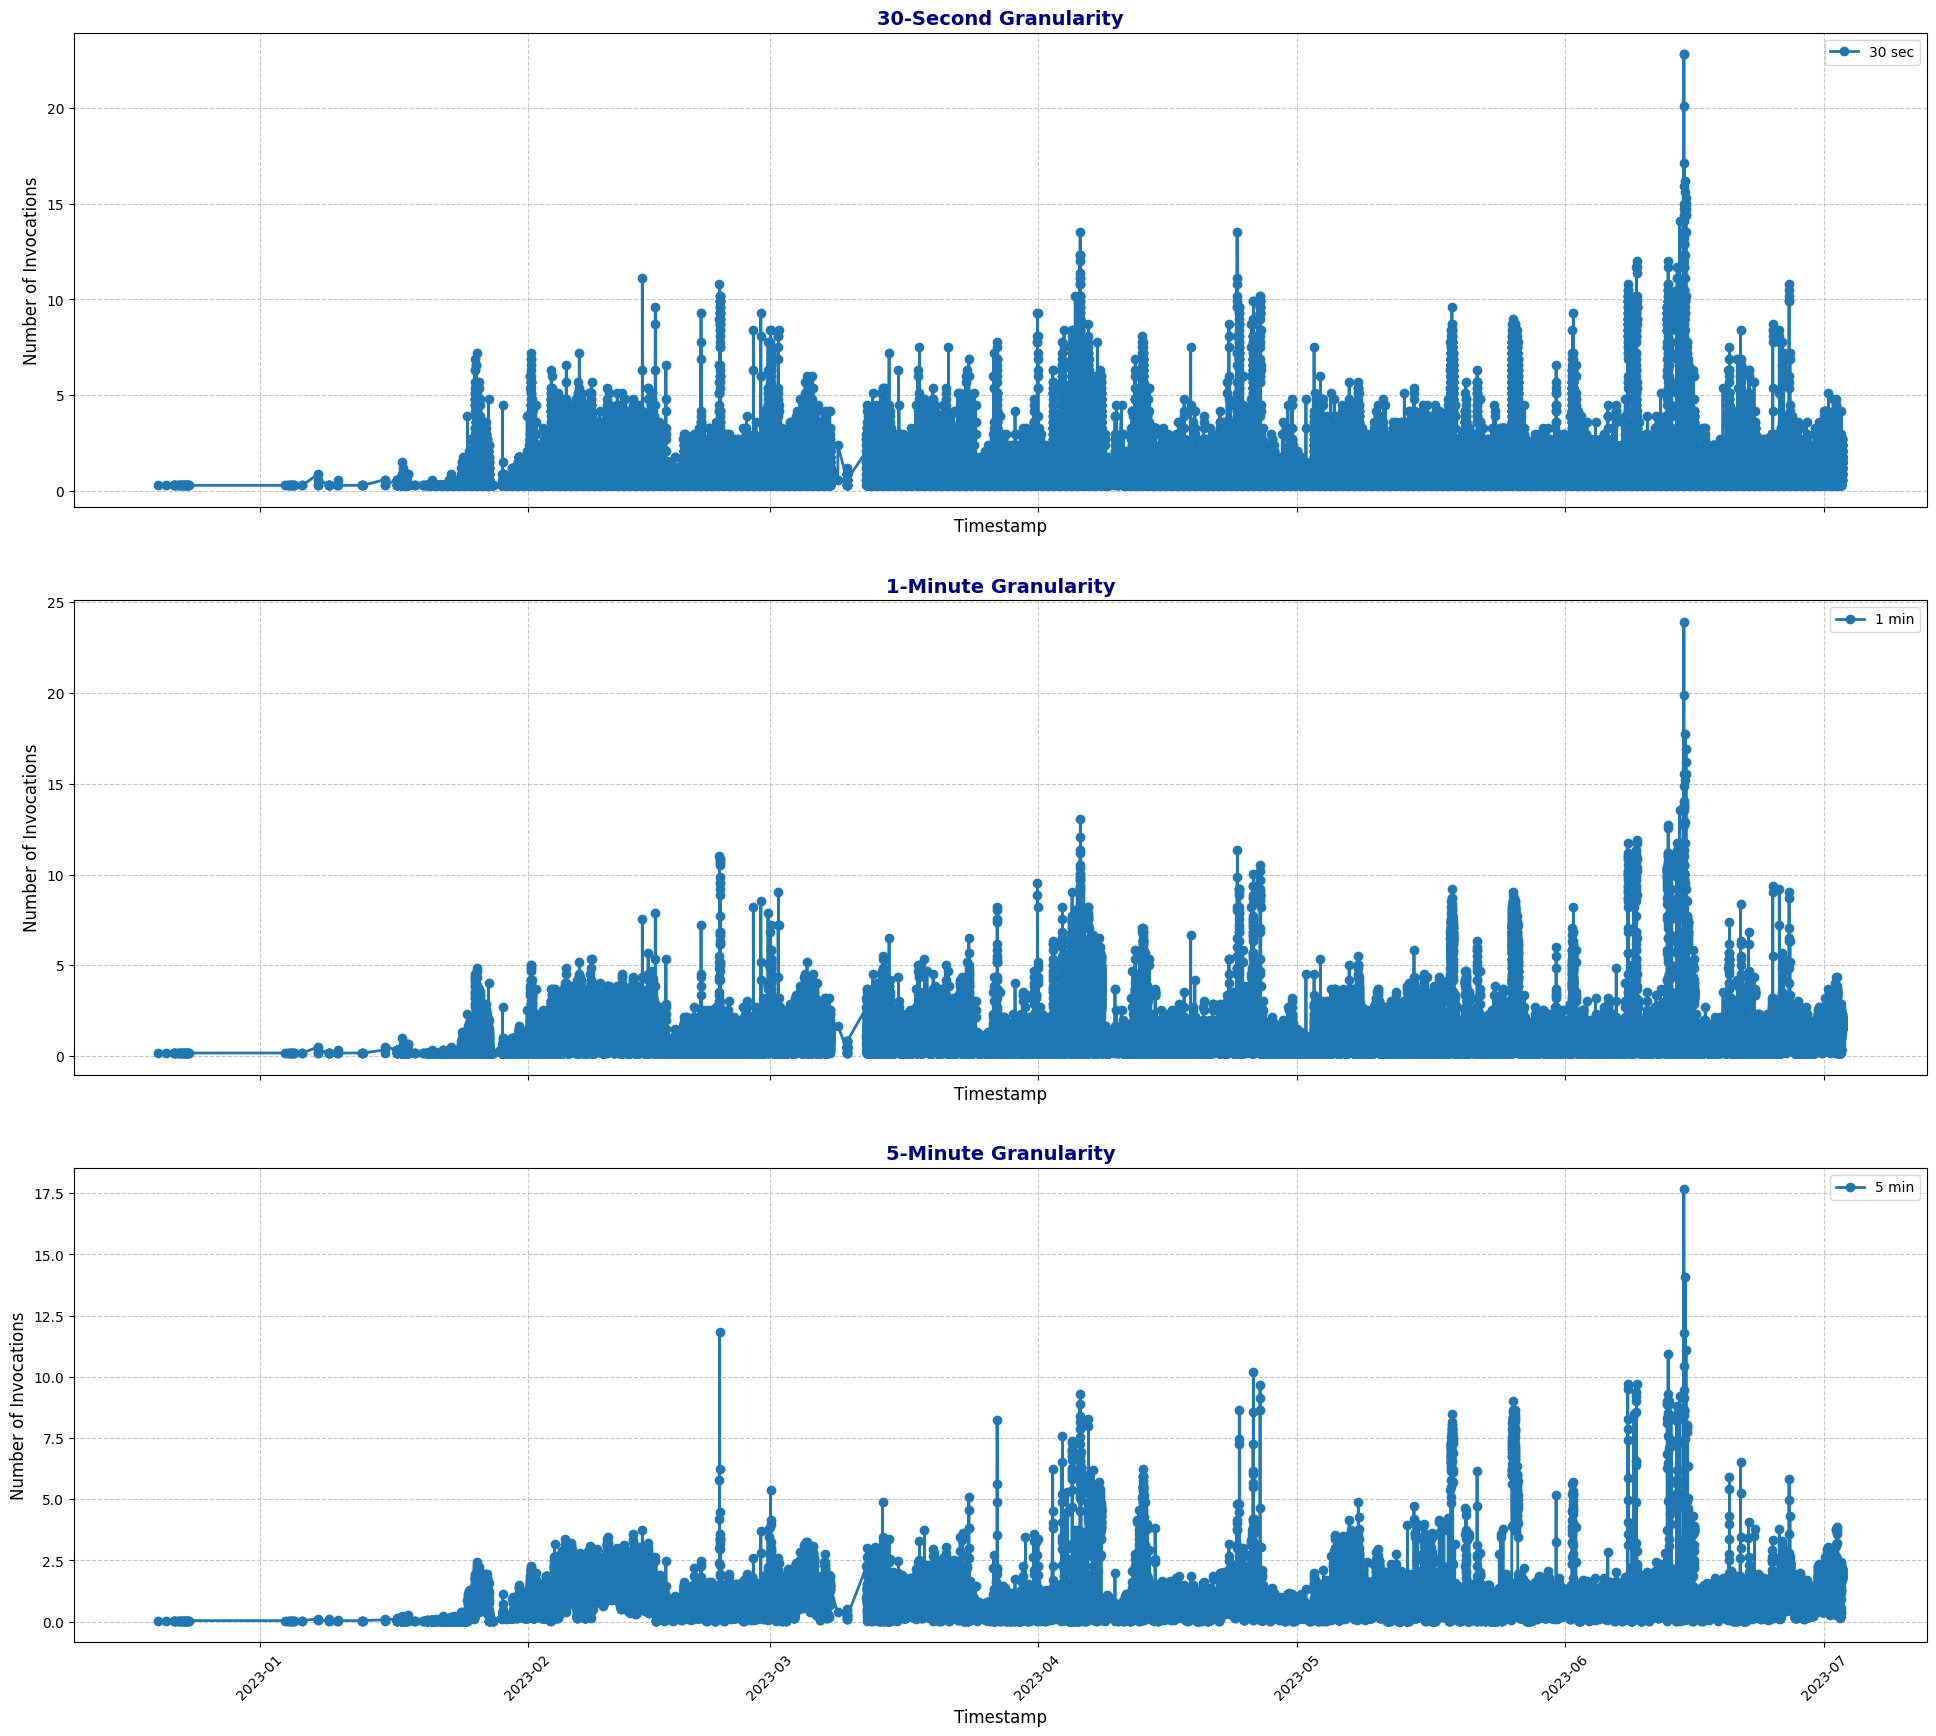

In [94]:
# Plot the data for three granularities
fig, axes = plt.subplots(3, 1, figsize=(20, 18), sharex=True)

# 1. 30-second granularity
plot_data(df_30, "timestamp", "n_invocations", "30-Second Granularity", axes[0], "30 sec", hourly_granularity==(1/120))

# 2. 1-minute granularity
plot_data(df_60, "timestamp", "n_invocations", "1-Minute Granularity", axes[1], "1 min", hourly_granularity=(1/60))

# 3. 5-minute granularity
plot_data(df_300, "timestamp", "n_invocations", "5-Minute Granularity", axes[2], "5 min", hourly_granularity=(5/60))

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()